# 1.a Make a Ball Fall due to Gravity

Assuming gravity is 9.8 m/s^2, Initial velocity is zero, and there is no air resistance

The program will print the time it takes to fall 20 meters. It should be very close to 2.02 seconds, since t = sqrt((2*20)/g) = 2.0203

In [1]:
from vpython import *
scene = canvas()

ball = sphere(pos=vector(0,20,0), radius=0.5,color=color.cyan, make_trail=False)

# velocity variables and updating position
ball.velocity = vector(0,0,0)
deltat = 0.005
t = 0
ball.pos = ball.pos + ball.velocity*deltat
scene.autoscale = False 
while ball.pos.y > 0:
    rate(100)
    ball.velocity.y = ball.velocity.y + -9.8 * deltat
    ball.pos.y = ball.pos.y + ball.velocity.y * deltat
    t = t + deltat 
    
print("t = " + str(t))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

t = 2.019999999999979


# 1.b Make a Ball do the big bounce

Assuming gravity is 9.8 m/s^2, Initial velocity is zero, zero air resistance, and all collisions are perfectly elastic. 

The ball should bounce up and down in an identical motion and should not bounce higher or lower than the initial starting position

Also, just to make the animation cleaner, I am making the bounds of the collisions be at the edge of the ball rather than the center. This is pretty easy to do, I just add the radius of the ball to the collision bound.

In [2]:
from vpython import *
scene = canvas()

ball = sphere(pos=vector(0,5,0), radius=0.5,color=color.cyan, make_trail=False)
floor = box(pos=vector(0,-5,0), size=vector(12,0.2,12), color=color.green)

# velocity variables and updating position
ball.velocity = vector(0,0,0)
deltat = 0.005
t = 0
ball.pos = ball.pos + ball.velocity*deltat
scene.autoscale = False 
while t < 10:
    rate(100)
    if ball.pos.y < floor.pos.y + ball.radius:
         ball.velocity.y = -ball.velocity.y
    ball.velocity.y = ball.velocity.y + -9.8 * deltat
    ball.pos.y = ball.pos.y + ball.velocity.y * deltat
    t = t + deltat 

<IPython.core.display.Javascript object>

# 1.c Launch ball through cannon

Assuming gravity is 9.8 m/s^2, Initial velocity is **14.14** m/s (10 x-velocity and 10 y-velocity), initial height of **1 m**zero air resistance, and all collisions are perfectly inelastic. 

The ball should show parabolic motion at any given angle of trajectory. To make this more visible, the ball will leave a trail. The ball will stop when it hits the floor.

To verify, the x-displacement of the ball should be near **44.8** at a launch angle of **45**. The x-position of the ball will be printed out at the bottom to compare. I 

In [3]:
from vpython import *
scene = canvas()

ball = sphere(pos=vector(0,1,0), radius=0.5,color=color.cyan, make_trail=True)
floor = box(pos=vector(0,0,0), size=vector(150,0.2,12), color=color.green)

# velocity variables and updating position
ball.velocity = vector(10,10,0)
deltat = 0.005
t = 0
ball.pos = ball.pos + ball.velocity*deltat
scene.autoscale = False 
while ball.pos.y > 0.7:
    rate(100)
    if ball.pos.y < floor.pos.y:
         ball.velocity.y = -ball.velocity.y
    ball.velocity.y = ball.velocity.y + -9.8 * deltat
    ball.pos.y = ball.pos.y + ball.velocity.y * deltat
    ball.pos.x = ball.pos.x + ball.velocity.x*deltat
    t = t + deltat 
print("x = " + str(ball.pos.x + 24))

<IPython.core.display.Javascript object>

x = 44.80000000000016


# 1.d Ball Falling With Air Resistance

Assuming gravity is 9.8 m/s^2, Initial velocity is zero, drag coefficient of air is 0.05, air density is 1.225 kg/m^3, the ball weights 1 kg.

reference for air resistance: https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/falling.html

I found that with a basic air resistance equation, it does not have a terminal velocity. However, the graph does show that objects with air resistance accelerate and fall slower than those without air resistance

<IPython.core.display.Javascript object>

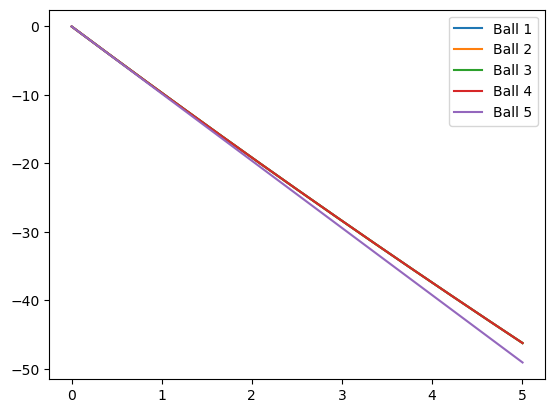

In [3]:
from vpython import *
import matplotlib.pyplot as plt
import numpy as np
scene = canvas()

ball = sphere(pos=vector(0,20,0), radius=0.5,color=color.cyan, make_trail=False)
ball2 = sphere(pos=vector(1,30,0), radius=0.5,color=color.red, make_trail=False)
ball3 = sphere(pos=vector(2,40,0), radius=0.5,color=color.green, make_trail=False)
ball4 = sphere(pos=vector(3,50,0), radius=0.5,color=color.purple, make_trail=False)
ball5 = sphere(pos=vector(4,20,0), radius=0.5,color=color.white, make_trail=False)

# arrays to plot
bArr1 = []
bArr2 = []
bArr3 = []
bArr4 = []
bArr5 = []

# velocity variables and updating position
ball.velocity = vector(0,0,0)
ball2.velocity = vector(0,0,0)
ball3.velocity = vector(0,0,0)
ball4.velocity = vector(0,0,0)
ball5.velocity = vector(0,0,0)
deltat = 0.005
t = 0
ball.pos = ball.pos + ball.velocity*deltat
ball2.pos = ball.pos + ball2.velocity*deltat
ball3.pos = ball.pos + ball3.velocity*deltat
ball4.pos = ball.pos + ball4.velocity*deltat
ball5.pos = ball.pos + ball5.velocity*deltat
scene.autoscale = False 
def accel(v):
    a = 0.05 * (1.225/2) * v * (3.14*0.25)
    return (9.8 + a)

while t < 5:
    rate(100)
    ball.velocity.y = ball.velocity.y + -(accel(ball.velocity.y)) * deltat
    ball.pos.y = ball.pos.y + ball.velocity.y * deltat
    bArr1.append(ball.velocity.y)
    
    ball2.velocity.y = ball2.velocity.y + -(accel(ball2.velocity.y)) * deltat
    ball2.pos.y = ball2.pos.y + ball2.velocity.y * deltat
    bArr2.append(ball2.velocity.y)
    
    ball3.velocity.y = ball3.velocity.y + -(accel(ball3.velocity.y)) * deltat
    ball3.pos.y = ball3.pos.y + ball3.velocity.y * deltat
    bArr3.append(ball3.velocity.y)
    
    ball4.velocity.y = ball4.velocity.y + -(accel(ball4.velocity.y)) * deltat
    ball4.pos.y = ball4.pos.y + ball4.velocity.y * deltat
    bArr4.append(ball4.velocity.y)
    
    ball5.velocity.y = ball5.velocity.y + -9.8 * deltat
    ball5.pos.y = ball5.pos.y + ball5.velocity.y * deltat
    bArr5.append(ball5.velocity.y)
    
    t = t + deltat 

x = np.linspace(0,t,1001)
plt.plot(x, bArr1, label = "Ball 1")
plt.plot(x, bArr2, label = "Ball 2")
plt.plot(x, bArr3, label = "Ball 3")
plt.plot(x, bArr4, label = "Ball 4")
plt.plot(x, bArr5, label = "Ball 5 (no air resistance)")
plt.legend()
plt.show()

# 1.e Ball bouncing with inelastic collisions
Assuming gravity is 9.8 m/s^2, Initial velocity is zero, zero air resistance, and all collisions are inelastic. Both the weight of the floor (as an object) and the ball are 1 kg, which makes the velocity of the ball decrease by 50% per impact. This is shown in the following equation: https://byjus.com/physics/inelastic-collision/

The ball should bounce up and down, and it should reach a quarter the height of the previous bounce

Also, just to make the animation cleaner, I am making the bounds of the collisions be at the edge of the ball rather than the center. This is pretty easy to do, I just add the radius of the ball to the collision bound.

In [8]:
from vpython import *
scene = canvas()

ball = sphere(pos=vector(0,5,0), radius=0.5,color=color.cyan, make_trail=False)
floor = box(pos=vector(0,-5,0), size=vector(12,0.2,12), color=color.green)

# velocity variables and updating position
ball.velocity = vector(0,0,0)
deltat = 0.005
t = 0
ball.pos = ball.pos + ball.velocity*deltat
scene.autoscale = False 
while t < 10:
    rate(100)
    if ball.pos.y < floor.pos.y + ball.radius:
         ball.velocity.y = -ball.velocity.y * 0.5
    ball.velocity.y = ball.velocity.y + -9.8 * deltat
    ball.pos.y = ball.pos.y + ball.velocity.y * deltat
    t = t + deltat 

<IPython.core.display.Javascript object>